In [69]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [70]:
#importing datasets
df_2001_2004 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\chaos\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
df_2001_2004.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [72]:
df_2001_2004.shape

(1923515, 23)

In [74]:
df_2001_2004.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Year,Longitude
count,1.923515e+06,1.923515e+06,1.923515e+06,1.923513e+06,1.223383e+06,1.223268e+06,1.892824e+06,1.923515e+06,1.892823e+06
mean,4.455517e+06,2.450314e+06,1.217773e+03,1.134669e+01,2.246317e+01,3.725664e+01,1.164549e+06,2.002354e+03,-8.767167e+01
std,6.692676e+05,7.662898e+05,7.086507e+02,6.977792e+00,1.392668e+01,2.146987e+01,1.617451e+04,1.795053e+00,5.880068e-02
min,8.790000e+02,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.178983e+01,-9.168657e+01
25%,3.931944e+06,1.819338e+06,6.240000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153269e+06,2.001000e+03,-8.771252e+01
50%,4.475318e+06,2.414899e+06,1.114000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165916e+06,2.002000e+03,-8.766638e+01
75%,4.957632e+06,3.017702e+06,1.813000e+03,1.700000e+01,3.300000e+01,5.600000e+01,1.176269e+06,2.003000e+03,-8.762885e+01
max,6.254041e+06,1.081375e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,2.004000e+03,-8.752453e+01


In [75]:
df_2001_2004.groupby(['Primary Type','Arrest']).count()

Unnamed: 0      ID  Case Number  \
Primary Type                     Arrest                                    
ARSON                            False         3230    3230         3230   
                                 True           598     598          598   
ASSAULT                          False        92918   92918        92918   
                                 True         28499   28499        28499   
BATTERY                          False       280486  280486       280486   
                                 True         83052   83052        83052   
BURGLARY                         False        95499   95499        95499   
                                 True          6403    6403         6403   
CRIM SEXUAL ASSAULT              False         5565    5565         5565   
                                 True          1514    1514         1514   
CRIMINAL DAMAGE                  False       203200  203200       203200   
                                 True         17098   17098        17098   
CRIMINAL TRESPASS                False        12441   12441        12441   
                                 True         45329   45329        45329   
DECEPTIVE PRACTICE               False        39878   39878        39878   
                                 True         15873   15873        15873   
DOMESTIC VIOLENCE                True             2       2            2   
GAMBLING                         False            8       8            8   
                                 True          4043    4043         4043   
HOMICIDE                         False         1176    1176         1176   
                                 True          1996    1996         1996   
INTERFERENCE WITH PUBLIC OFFICER False          297     297          297   
                                 True          1404    1404         1404   
INTIMIDATION                     False         1063    1063         1063   
                                 True           249     249          249   
KIDNAPPING                       False         2667    2667         2667   
                                 True           355     355          355   
LIQUOR LAW VIOLATION             False            7       7            7   
                                 True          5377    5377         5377   
MOTOR VEHICLE THEFT              False        86918   86918        86918   
                                 True         12006   12006        12006   
NARCOTICS                        False           46      46           46   
                                 True        210554  210554       210554   
NON-CRIMINAL                     False            1       1            1   
OBSCENITY                        False            4       4            4   
                                 True            70      70           70   
OFFENSE INVOLVING CHILDREN       False         7964    7964         7964   
                                 True          3217    3217         3217   
OTHER NARCOTIC VIOLATION         True            22      22           22   
OTHER OFFENSE                    False       101466  101466       101466   
                                 True         22287   22287        22287   
PROSTITUTION                     False            4       4            4   
                                 True         25662   25662        25662   
PUBLIC INDECENCY                 True            29      29           29   
PUBLIC PEACE VIOLATION           False         6036    6036         6036   
                                 True          4109    4109         4109   
RITUALISM                        False           13      13           13   
                                 True             2       2            2   
ROBBERY                          False        64137   64137        64137   
                                 True          6849    6849         6849   
SEX OFFENSE                      False         5541    5541         5541   
             

In [76]:
df_2001_2004['Description'].count()

1923515

In [77]:
df_2001_2004['Date'] = pd.to_datetime(df_2001_2004['Date'])

In [78]:
df_2001_2004.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,2004-01-01 00:01:00,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,2004-06-20 11:00:00,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,2004-12-30 20:00:00,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [79]:
df_2001_2004 = df_2001_2004.set_index(['Date'])
#df_2001_2004 = df_2001_2004.set_index(['Primary Type'])
df_2001_2004.loc['2004-01-01':'2004-12-31']

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01 00:01:00,879,4786321,HM399414,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2004-06-20 11:00:00,2919,4789749,HM402220,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2004-12-30 20:00:00,2927,4789765,HM402058,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2004-08-01 00:01:00,3633,4838048,HM440266,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,False,...,24.0,29.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2004-09-16 10:00:00,4564,4792195,HM405396,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,42.0,8.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2004-11-01 00:01:00,6564,4795453,HM409822,058XX N WINTHROP AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,48.0,77.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2004-11-01 00:00:00,8901,4800321,HM414182,026XX E 78TH ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,43.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2004-01-01 00:00:00,15334,4809407,HM423503,001XX W RANDOLPH ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,...,42.0,32.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2004-12-13 13:00:00,18120,4815217,HM417727,067XX S CORNELL AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,5.0,43.0,11,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN


Text(0,0.5,'Total')

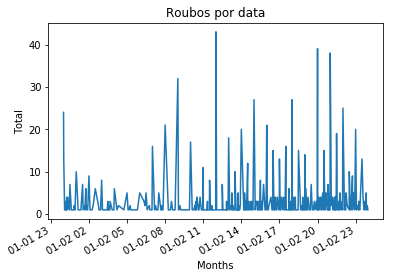

In [84]:
#quebra por mes; 
df_by_year = df_2001_2004.loc['2004-01-02':'2004-01-02']
Roubos_by_data = df_by_year.groupby(['Date']).size()
Roubos_by_data
plot_by_month = Roubos_by_data.plot(title='Roubos por data')
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total')

In [ ]:
#quebra por dia
# By Day
sales_by_day = df.groupby('Day').size()
plot_by_day = sales_by_day.plot(title='Daily Sales',xticks=(range(1,31)),rot=55)
plot_by_day.set_xlabel('Day')
plot_by_day.set_ylabel('Total Sales')